In [9]:
import os
import glob
import time
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
os.listdir('C:\\Users\\Akshay\\Downloads\\BBC News Summary\\Summaries')

['business', 'entertainment', 'politics', 'sport', 'tech']

In [16]:
articles_path = 'C:\\Users\\Akshay\\Downloads\\BBC News Summary\\News Articles'
summaries_path = 'C:\\Users\\Akshay\\Downloads\\BBC News Summary\\Summaries'
categories_list = ['business', 'entertainment', 'politics', 'sport', 'tech']

In [17]:
def read_files_from_folders(articles_path, summaries_path, categories_list=['tech', 'sport'], encoding = 'ISO-8859-1'):
    articles = []
    summaries = []
    categories = []
    for category in categories_list:
        article_paths = glob.glob(os.path.join(articles_path, category, '*.txt'), recursive = True)
        summary_paths = glob.glob(os.path.join(summaries_path, category, '*.txt'), recursive = True)

        print(f'found {len(article_paths)} file in articles/{category} folder, {len(summary_paths)} file in summaries/{category}')

        if len(article_paths) != len(summary_paths):
            print('Number of files is not equal')
            return 
        for idx_file in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[idx_file], mode='r', encoding = encoding) as file:
                articles.append(file.read())

            with open(summary_paths[idx_file], mode = 'r', encoding = encoding) as file:
                summaries.append(file.read())

    print(f'total {len(articles)} file in articles folders, {len(summaries)} file in summaries folders')
    return articles, summaries, categories


In [18]:
articles, summaries, categories = read_files_from_folders(articles_path, summaries_path, categories_list)

found 510 file in articles/business folder, 510 file in summaries/business
found 386 file in articles/entertainment folder, 386 file in summaries/entertainment
found 417 file in articles/politics folder, 417 file in summaries/politics
found 511 file in articles/sport folder, 511 file in summaries/sport
found 401 file in articles/tech folder, 401 file in summaries/tech
total 2225 file in articles folders, 2225 file in summaries folders


In [19]:
df = pd.DataFrame({'articles':articles, 'summaries': summaries, 'categories': categories},)
df

,articles,summaries,categories
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...,business
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...,business
...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...,tech
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...,tech
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...,tech


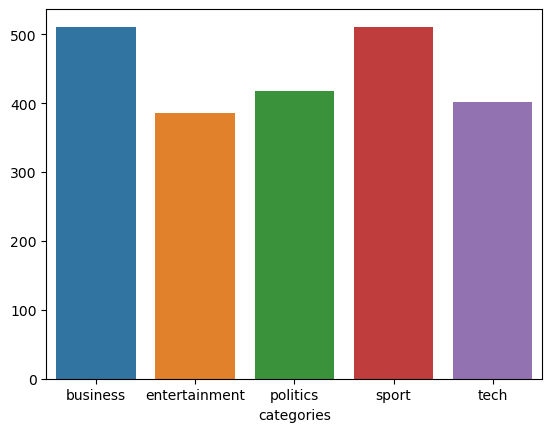

In [20]:
category_sizes = df.groupby('categories').size()
sns.barplot(x=category_sizes.index, y = category_sizes)
plt.show()

In [21]:
## --- get length of each article and summary for analysis
df['articles_length'] = df['articles'].apply(lambda x: len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x: len(x.split()))


In [22]:
df

,articles,summaries,categories,articles_length,summaries_length
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...,business,421,134
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...,business,384,158
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...,business,264,121
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...,business,265,106
...,...,...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...,tech,420,186
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...,tech,357,130
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...,tech,1050,475
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...,tech,379,137


In [23]:
category_length = df.groupby('categories', 0).agg( {'articles_length': 'mean', 'summaries_length': 'mean'} )
category_length

,articles_length,summaries_length
categories,,
business,328.880392,139.929412
entertainment,330.621762,144.049223
politics,453.973621,195.709832
sport,329.262231,143.187867
tech,502.695761,213.837905


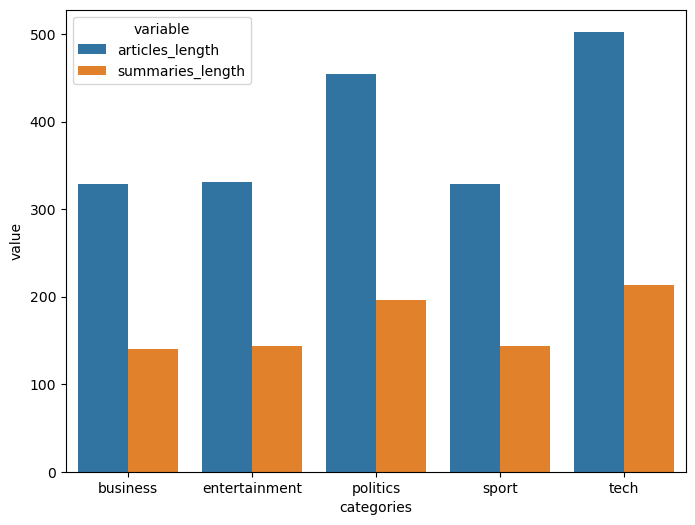

In [24]:
category_length = df.groupby('categories', 0).agg( {'articles_length': 'mean', 'summaries_length': 'mean'} )
df_m = pd.melt(category_length, ignore_index=False)
plt.figure(figsize=(8,6))
sns.barplot(x=df_m.index, y="value", hue='variable', data = df_m)
plt.show()

In [25]:
pd.melt(category_length, ignore_index=False).groupby('variable').mean()

,value
variable,
articles_length,389.086753
summaries_length,167.342848


In [26]:
# !nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
# !pip install transformers==4.5.0

  Using cached transformers-4.5.0-py3-none-any.whl (2.1 MB)
  Using cached tokenizers-0.10.3.tar.gz (212 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build tokenizers


  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\tokenizers
      copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers
      creating build\lib.win-amd64-cpython-310\tokenizers\models
      copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers\models
      creating build\lib.win-amd64-cpython-310\tokenizers\decoders
      copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers\decoders
      creating build\lib.win-amd64-cpython-310\tokenizers\normalizers
      copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers\normalizers
      creating build\lib.

In [ ]:
# !pip install --quiet pytorch-lightning==1.2.7

In [33]:
import json
import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset,DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer
)
from tqdm.auto import tqdm

In [35]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize']=16,10

In [36]:
df

,articles,summaries,categories,articles_length,summaries_length
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...,business,421,134
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...,business,384,158
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...,business,264,121
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...,business,265,106
...,...,...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...,tech,420,186
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...,tech,357,130
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...,tech,1050,475
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...,tech,379,137


In [37]:
df = df[['articles', 'summaries']]

In [38]:
df

,articles,summaries
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...


In [39]:
df['articles'] = df['articles'].str.encode('ascii', 'ignore').str.decode('ascii')
df['summaries'] = df['summaries'].str.encode('ascii', 'ignore').str.decode('ascii')

C:\Users\Akshay\AppData\Local\Temp\ipykernel_12384\2014681919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['articles'] = df['articles'].str.encode('ascii', 'ignore').str.decode('ascii')
C:\Users\Akshay\AppData\Local\Temp\ipykernel_12384\2014681919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summaries'] = df['summaries'].str.encode('ascii', 'ignore').str.decode('ascii')


In [40]:
df

,articles,summaries
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...


In [41]:
df = df.dropna()

In [42]:
df

,articles,summaries
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...


In [43]:
train_df, test_df = train_test_split(df,test_size=0.1)

In [44]:
train_df

,articles,summaries
790,Church urges Nelly show boycott\n\nChurch mini...,"""Tear the tickets up,"" Mr Rodgers said.Tim Dea..."
1409,Moyes U-turn on Beattie dismissal\n\nEverton m...,"Speaking immediately after the game, Moyes sai..."
1448,Iranian misses Israel match\n\nIranian striker...,A Bayern spokesman said on Monday that the dec...
1462,Jol joy at 'professional' Cup win\n\nTottenham...,"""If you play like we did and concede two goals..."
1861,Movie body hits peer-to-peer nets\n\nThe movie...,It has filed 100 lawsuits against operators of...
...,...,...
2005,Mobile gig aims to rock 3G\n\nForget about goi...,People with 3G phones in the UK can already do...
1740,Federer forced to dig deep\n\nTop seed Roger F...,Top seed Roger Federer had to save two match p...
782,Famed music director Viotti dies\n\nConductor ...,"Viotti, director of La Fenice since 2002, cond..."
198,Georgia plans hidden asset pardon\n\nGeorgia i...,"Mr Saakashvili, elected president in January a..."


In [45]:
test_df

,articles,summaries
1405,Costin aims for comeback in 2006\n\nJamie Cost...,Jamie had to wear a body cast for three and a ...
1817,Soderling wins tense Milan final\n\nFifth seed...,Fifth seed Robin Soderling took the Milan Indo...
956,Assembly ballot papers 'missing'\n\nHundreds o...,"A spokesman for Darlington Council said: ""We h..."
10,Ask Jeeves tips online ad revival\n\nAsk Jeeve...,Ask Jeeves has become the third leading online...
1870,Millions buy MP3 players in US\n\nOne in 10 ad...,One in 10 adult Americans - equivalent to 22 m...
...,...,...
28,UK firm faces Venezuelan land row\n\nVenezuela...,The Vestey Group said it had owned the land si...
1631,Pountney handed ban and fine\n\nNorthampton co...,Northampton coach Budge Pountney has been fine...
1155,Labour seeks to quell feud talk\n\nLabour's le...,The new book claims Mr Prescott hosted a dinne...
1695,Dawson wins England squad recall\n\nWasps scru...,Wasps scrum-half Matt Dawson has been recalled...


In [47]:
class NewsSummaryDataset(Dataset):
    def __init__(
        self, 
        data: pd.DataFrame,
        tokenizer: T5Tokenizer,
        text_max_token_len: int = 512,
        summary_max_token_len: int = 218
    ):
        self.tokenizer = tokenizer
        self.data = data
        self.text_max_token_len = summary_max_token_len
        
        def __len__(self):
            return len(self.data)

        def __getitem__(self, index:int):
            data_row = self.data.iloc[index]

            text = data_row['articles']
            text_encoding = tokenizer(
                text,
                max_length = self.text_max_token_len,
                padding = 'max_length',
                truncation = True,
                return_attention_mask = True,
                add_special_tokens = True,
                return_tenosrs = 'pt'
            )

            summary_encoding = tokenizer(
                data_row['summaries'],
                max_length=self.summary_max_token_len,
                padding = 'max_length',
                truncation = True,
                return_attention_mask = True,
                add_special_tokens = True,
                return_tenosrs = 'pt'
            )

            labels = summary_encoding['inputs_ids']
            labels[labels == 0] = -100              # To make sure we have correct labels for T5 text generation

            return dict(
                text = text, 
                summary = data_row['summaries'],
                text_input_ids = text_encoding['input_ids'].flatten(),
                text_attention_mask = text_encoding['attention_mask'].flatten(),
                labels = labels.flatten(),
                labels_attention_mask=summary_encoding['attention_mask'].flatten()
            )

In [48]:
test_df

,articles,summaries
1405,Costin aims for comeback in 2006\n\nJamie Cost...,Jamie had to wear a body cast for three and a ...
1817,Soderling wins tense Milan final\n\nFifth seed...,Fifth seed Robin Soderling took the Milan Indo...
956,Assembly ballot papers 'missing'\n\nHundreds o...,"A spokesman for Darlington Council said: ""We h..."
10,Ask Jeeves tips online ad revival\n\nAsk Jeeve...,Ask Jeeves has become the third leading online...
1870,Millions buy MP3 players in US\n\nOne in 10 ad...,One in 10 adult Americans - equivalent to 22 m...
...,...,...
28,UK firm faces Venezuelan land row\n\nVenezuela...,The Vestey Group said it had owned the land si...
1631,Pountney handed ban and fine\n\nNorthampton co...,Northampton coach Budge Pountney has been fine...
1155,Labour seeks to quell feud talk\n\nLabour's le...,The new book claims Mr Prescott hosted a dinne...
1695,Dawson wins England squad recall\n\nWasps scru...,Wasps scrum-half Matt Dawson has been recalled...


In [57]:
class NewsSummaryDataModule(pl.LightningDataModule):
    def __init__(
        self, 
        train_df: pd.DataFrame,
        test_df: pd.DataFrame,
        tokenizer: T5Tokenizer,
        batch_size: int = 8,
        text_max_token_len: int = 512,
        summary_max_token_len: int = 128
    ):    

        super().__init__()

        self.train_df = train_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len
        
        def setup(self, stage = None):
            self.train_dataset = NewsSummaryDataset(
                self.train_df,
                self.tokenizer,
                selg.text_max_token_len,
                self.summary_max_token_len
            )
            self.test_dataset = NewsSummaryDataset(
                self.test_df,
                self.tokenizer,
                self.text_max_token_len,
                self.summary_max_token_len
            )
        
        def train_dataloader(self):
            return DataLoader(
                self.train_dataset,
                batch_size = self.batch_size,
                shuffle = True,
                num_workers = 2
            )
    

In [52]:
MODEL_NAME = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

c:\Users\Akshay\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [54]:
text_token_counts, summary_token_counts = [], []

for _, row in train_df.iterrows():
    text_token_count = len(tokenizer.encode(row['articles']))
    text_token_counts.append(text_token_count)

    summary_token_count = len(tokenizer.encode(row['summaries']))
    summary_token_counts.append(summary_token_count)

<Axes: ylabel='Count'>

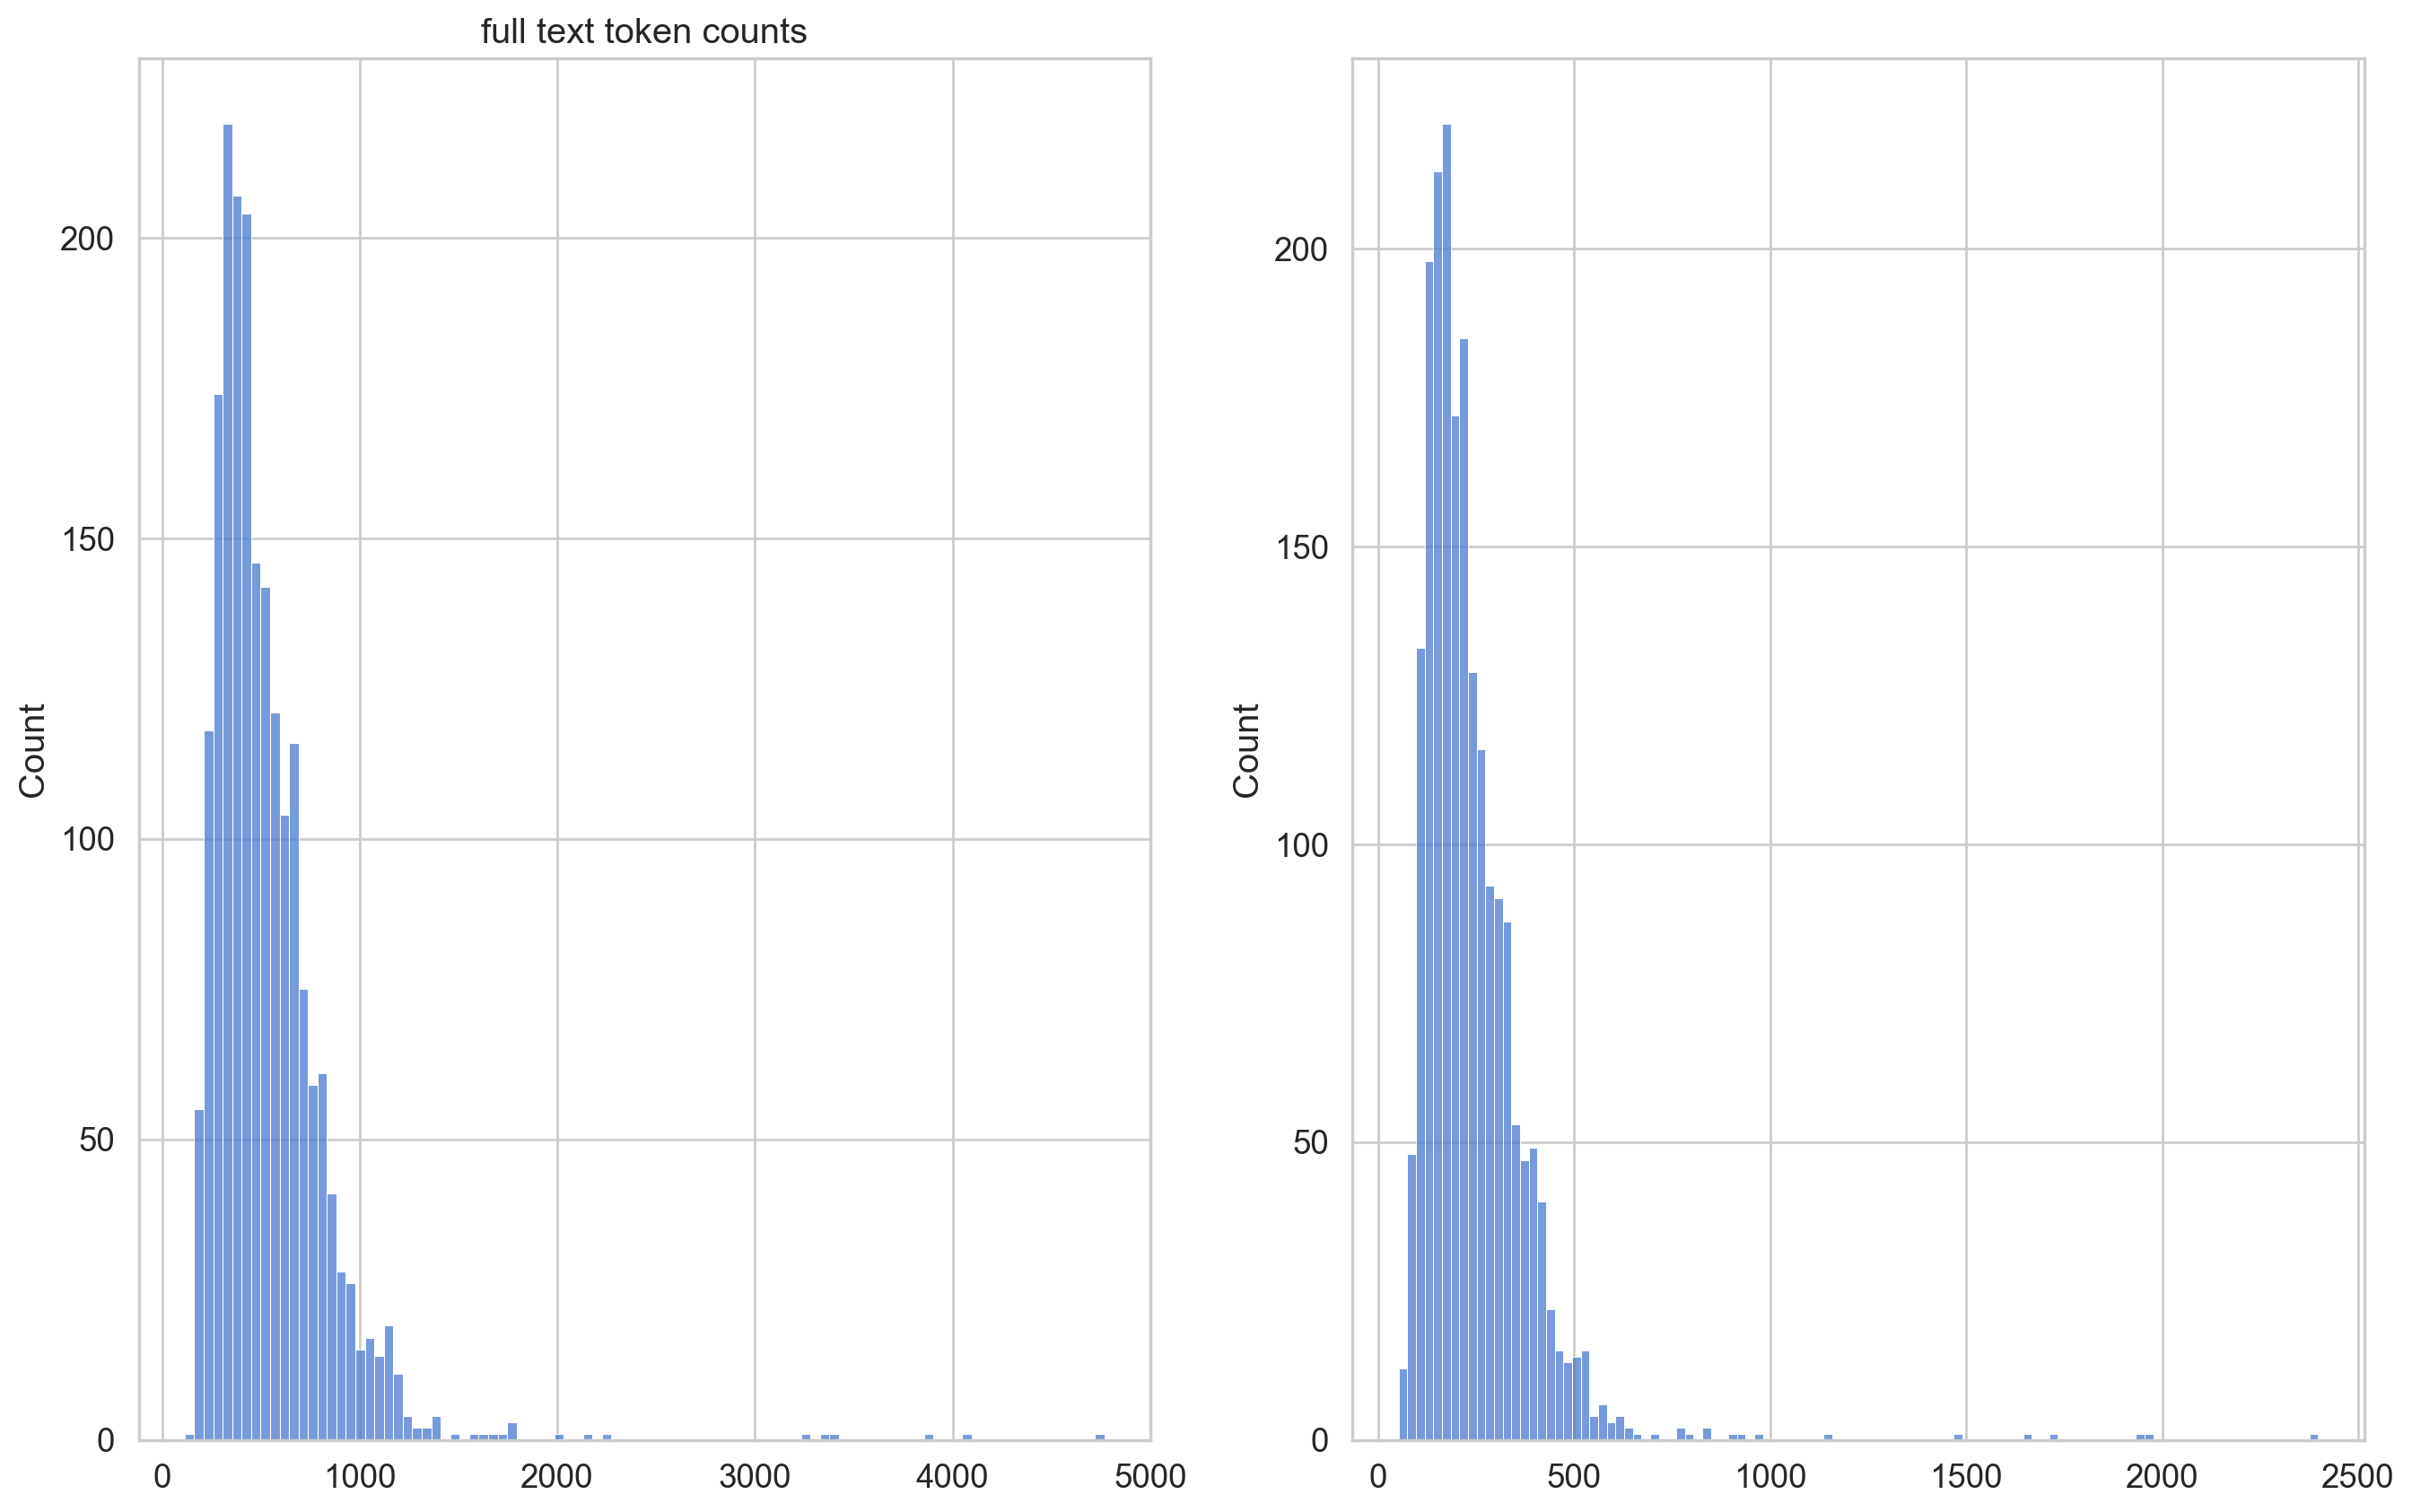

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(text_token_counts, ax = ax1)
ax1.set_title('full text token counts')
sns.histplot(summary_token_counts, ax = ax2)

In [59]:
N_EPOCHS = 3
BATCH_SIZE = 8
data_module = NewsSummaryDataModule(train_df, test_df, tokenizer)

MODEL

In [61]:
class NewsSummaryModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict = True)

    def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
        output = self.model(
            input_ids,
            attention_mask = attention_mask,
            labels = labels,
            decoder_attention_mask = decode_attention_mask
        )

        return output.loss, output.logits

    def training_step(self, batch, batch_size):
        input_ids = batch['text_input_ids']
        attention_mask = batch['text_attention_mask']
        labels = batch['labels']
        labels_attention_mask = batch['labels_attention_mask']

        loss, outputs = self(input_ids = input_ids,
            attention_mask = attention_mask,
            decoder_attention_mask = labels_attention_mask,
            labels = labels
        )

        self.log("test_loss", loss, prog_bar = True, logger=True)
        return loss

    def configure_optimizers(self):
        return AdamW(self.parameters(), lr=0.0001)
            

In [63]:
model = NewsSummaryModel()

ConnectionError: HTTPSConnectionPool(host='cdn-lfs.huggingface.co', port=443): Read timed out.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./lightning_logs

In [ ]:
checkpoint_callback = ModelCheckpoint(
    dirpath = 'checkpoints',
    filename = 'best-checkpoint',
    save_top_k = 1,
    verbose = True,
    monitor = 'val_loss',
    mode = 'min'
)

logger = TensorBoardLogger("lightning_logs", name='news-summary')

trainer = pl.Trainer(
    logger=logger,
    checkpoint_callback=checkpoint_callback,
    max_epochs=N_EPOCHS,
    gpus = 1,
    progress_bar_refresh_rate=30
)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import gc
gc.collect()

In [ ]:
trainer.fit(model, data_module)

In [ ]:
trained_model = NewsSummary_Model.load_from_chechpoint(
    trainer.checkpoint_callback.best_model_path
)
trained_model.freeze()

In [64]:
def summarizeText(text):
    text_encoding = tokenizer(
        text,
        max_length=512,
        padding='max_length',
        truncation = True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors = 'pt'
    )
    generated_ids = trained_model.model.generate(
        input_ids=text_encoding['input_ads'],
        attention_mask=text_encoding['attention_mask'],
        max_length = 150,
        num_beams = 2,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True
    )

    preds = [
            tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
            for gen_id in generated_ids
    ]
    return "".join(preds)

In [ ]:
sample_row = test_df.iloc[0]
text = sample_row['articles']
model_summary = summarizeText(text)
text

In [ ]:
sample_row['summaries']

In [ ]:
model_summary

In [ ]:
sample_row = test_df.iloc[0]
text = sample_row['articles']
model_summary = summarizeText(text)
text

In [ ]:
model_summary